# Protuberance in the solar corona
Magnetic field lines aren't properly drawn but it gives more or less the idea.

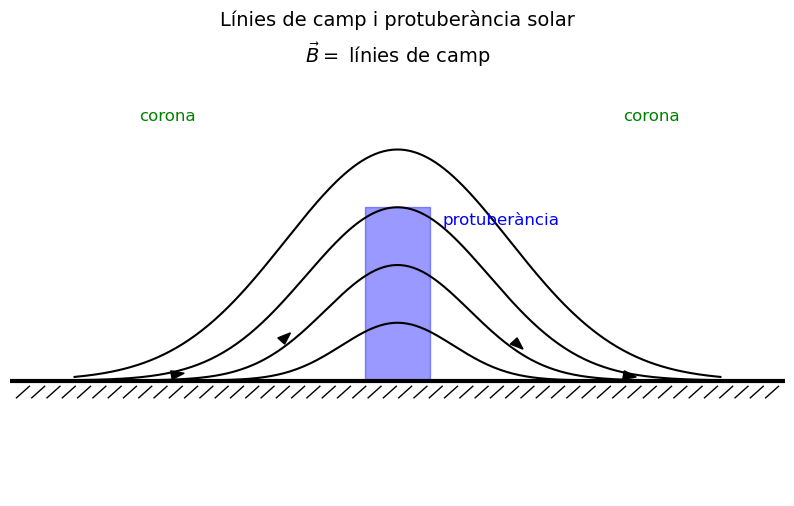

In [64]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-6, 6)
ax.set_ylim(-2, 6)
ax.axis('off')

# Línia gruixada de la superfície
ax.plot([-6, 6], [0, 0], color='black', linewidth=3)

# Línies diagonals sota la superfície (simulant "terra" o "superfície")
for x in np.linspace(-5.8, 5.8, 50):
    ax.plot([x - 0.1, x + 0.1], [-0.3, -0.1], color='black', linewidth=1)

# Textos
ax.text(0, 5.5, r'$\vec{B} =$ línies de camp', fontsize=14, ha='center')
ax.text(-4, 4.5, 'corona', color='green', fontsize=12)
ax.text(3.5, 4.5, 'corona', color='green', fontsize=12)
ax.text(0.7, 2.7, 'protuberància', color='blue', fontsize=12)

# Protuberància solar
protuberancia = plt.Rectangle((-0.5, 0), 1.0, 3, color='blue', alpha=0.4)
ax.add_patch(protuberancia)

# Línies de camp magnètic
x = np.linspace(-5, 5, 300)
def field_line(x, height, scale):
    return height * np.exp(-x**2 / scale)

heights = [1, 2, 3, 4]
scales = [1.5, 2.5, 4, 6]

for h, s in zip(heights, scales):
    y = field_line(x, h, s)
    ax.plot(x, y, color='black')

# Puntes de fletxa (només la punta) sobre línies de camp
arrow_positions = [(-3.5, 2), (-1.8, 2.5), (1.8, 2.5), (3.5, 2)]
for x0, h in arrow_positions:
    s = 2.5 if abs(x0) < 3 else 4
    y0 = field_line(x0, h, s)
    dy = 0.001
    slope = (field_line(x0 + dy, h, s) - y0) / dy
    angle = np.arctan(slope)
    dx = 0.2 * np.cos(angle)
    dy = 0.2 * np.sin(angle)
    ax.arrow(x0, y0, dx, dy, head_width=0.15, head_length=0.2, fc='black', ec='black', length_includes_head=True)

plt.title("Línies de camp i protuberància solar", fontsize=14)
plt.show()


 # Representation of the 2D problem to be solved (F&S modes)


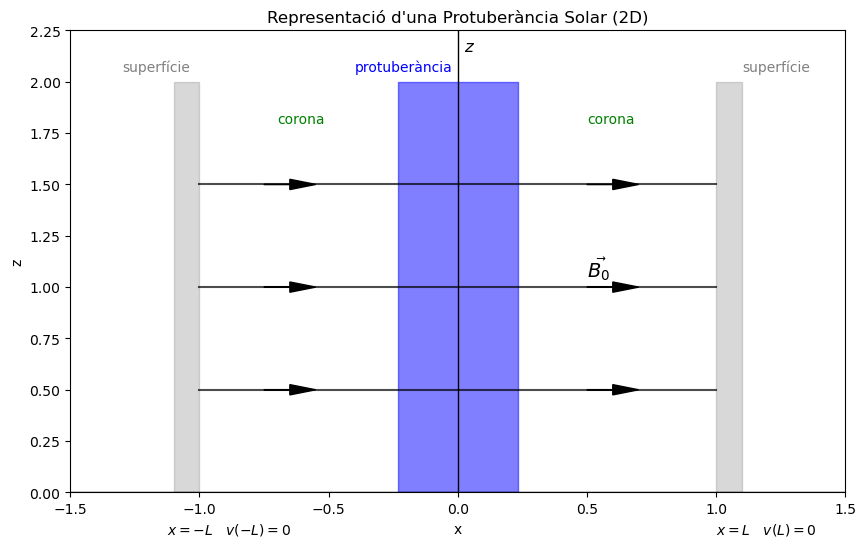

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Configuració del gràfic
plt.figure(figsize=(10, 6))

# Definim els límits de la protuberància (amplada reduïda)
L = 1.0
x = np.linspace(-L, L, 100)
z = np.linspace(0, 2, 100)

# Dibuixem la protuberància (rectangle central més petit)
plt.fill_between(x, 0, 2, where=(x >= -0.25) & (x <= 0.25), color='blue', alpha=0.5, label='Protuberància')

# Dibuixem les superfícies laterals (Sol)
plt.fill_betweenx(z, -L-0.1, -L, color='gray', alpha=0.3, label='Superfície')
plt.fill_betweenx(z, L, L+0.1, color='gray', alpha=0.3)

# Eixos i etiquetes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Etiquetes de les regions
plt.text(-L-0.3, 2.05, 'superfície', fontsize=10, color='gray')
plt.text(L+0.1, 2.05, 'superfície', fontsize=10, color='gray')
plt.text(-L+0.3, 1.8, 'corona', fontsize=10, color='green')
plt.text(L-0.5, 1.8, 'corona', fontsize=10, color='green')
plt.text(-0.4, 2.05, 'protuberància', fontsize=10, color='blue')

# Etiquetes dels eixos
plt.text(L, -0.2, r'$x = L \quad v(L) = 0$', fontsize=10)
plt.text(-L-0.125, -0.2, r'$x = -L \quad v(-L) = 0$', fontsize=10)
#plt.text(0.1, -0.2, r'$x$', fontsize=12)
plt.text(0.025, 2.15, r'$z$', fontsize=12)


# Dibuixem línies horitzontals discontínues
z_values = [0.5, 1.0, 1.5]
for z_val in z_values:
    plt.plot(x, [z_val]*len(x), linestyle='-', color='black', alpha=0.7)

plt.text(0.5, 1.05, r'$\vec{B_0}$', fontsize=14, color='black')

# Afegim puntes de fletxa a les línies horitzontals
arrow_length = 0.1  # Longitud de la fletxa
for z_val in z_values:
    plt.arrow(-0.75, z_val, arrow_length, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')
    plt.arrow(0.6 - arrow_length, z_val, arrow_length, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')

# Configuració final
plt.title('Representació d\'una Protuberància Solar (2D)')
plt.xlabel('x')
plt.ylabel('z')
plt.xlim(-L-0.5, L+0.5)
plt.ylim(0, 2.25)

plt.show()